### 🖋 **Notebook Contents**

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding
3. Exploratory Data Analysis (EDA)
4. Preprocessing

****

## `Initial Setup`

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import lines, patches
import matplotlib.pyplot as plt

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import shapiro # uji normalitas menggunakan metode shapiro

# custom 'summer' colormap
import matplotlib
min_val, max_val = 1, 0
n = 10
orig_cmap = plt.cm.summer
colors = orig_cmap(np.linspace(min_val, max_val, n))
CUSTOM_SUMMER = matplotlib.colors.LinearSegmentedColormap.from_list("my cmap", colors)

# single color
COLOR = "#85bb65"

## `Business Problem Understanding`

**Context**:

Terdapat suatu perusahaan yang bergerak dibidang perbankan/keuangan, yaitu **Bank Beta**. Saat ini Bank Beta memiliki suatu data mengenai perilaku kurang lebih 9000 pengguna/nasabah yang menggunakan kartu kredit **selama 6 bulan kebelakang**. Beberapa perilaku tersebut antara lain, jumlah sisa saldo yang dapat digunakan (balance), seberapa sering nasabah menggunakan kartu kreditnya, jumlah saldo yang telah digunakan, dll.

**Problem Statement**:

Saat ini Marketing Departement masih kesulitan untuk mengadakan campaign marketing kepada para nasabahnya, karena masih belum mengetahui karakteristik dari para nasabahnya. Campaign marketing yang tepat sangat penting untuk dilakukan, berdasarkan referensi di bawah, jika melakukan campaign marketing yang tidak tepat sasaran dan nasabah memiliki pengalaman yang buruk (negative experiences) hanya satu kali saja, sehingga gagal untuk memenuhi ekspektasi dari nasabah, maka 61% dari total nasabah akan **pindah ke competitor lainnya**. Bahkan, akan meninggkat menjadi 76% jika nasabah memiliki pengalaman yang buruk (negative experiences) hingga berkali-kali. Jika hal ini terjadi pada Bank Beta, tentu hal ini akan berdampak buruk bagi revenue Bank Beta. Selain itu, rata-rata per tahun bank kehilangan nasabahnya sebesar 12.5%, sedangkan akuisisi nasabah baru sebesar 13%, namun biaya (cost) akuisisi nasabah baru 5 kali lebih besar daripada mempertahankan nasabah lama. Kemudian, jika ada pengurangan 5% (saja) dari nasabah yang hilang (customer turnover), maka bank bisa meningkatkan _net profit_ sebesar 80%. Oleh karena itu, Bank Beta ingin meminimalisir kemungkinan hal tersebut terjadi. Salah satu cara yang dapat dilakukan adalah dengan melakukan campaign marketing yang tepat ke nasabah yang tepat pula.

Tim Data Scientist akan merumuskan beberapa permasalahan, antara lain:
- Bagaimana pola-pola (pattern)/karakteristik tersembunyi dari para nasabah jika dilakukan pendekatan menggunakan algoritma _unsupervised machine larning_ ?
- Bagaimana karakteristik dari masing-masing cluster terbentuk ?
- .....

Referensi:
- [Effective data-driven campaigning for credit cards: target, attract, retain and engage](https://www.acuitykp.com/blog/effective-data-driven-campaigning-for-credit-cards/#:~:text=Industry%20studies%20suggest%20that%20if%20a%20provider%20fails%20to%20exceed%20customer%20expectations%2C%20after%20just%20one%20negative%20experience%2C%20more%20than%20half%20(61%25)%20of%20the%20customers%20say%20they%20would%20move%20to%20a%20competitor%3B%20this%20number%20rises%20to%2076%25%20in%20the%20case%20of%20multiple%20negative%20experiences.)
- [The Cost of Customer Churn](https://www.fpsc.com/the_cost_of_customer_churn.pdf)

**Goals**:

Bank Beta bisa mengetahui bagaimana karakteristik para nasabah. Dengan mengetahui karakteristik tersebut, tim Marketing Departement Bank Beta bisa melakukan campaign marketing yang tepat untuk para nasabahnya. Diharapkan dengan campaign marketing yang tepat dapat membuat para nasabah untuk semakin sering menggunakan kartu kreditnya, sehingga Bank beta dapat **meningkatkan _revenue_**.

.....

**Project Stakeholders**:

Marketing Departement: departement ini bertanggungjawab untuk memaksimalkan revenue dengan cara melakukan beberapa strategi marketing (misalnya, promosi atau diskon) kepada pelanggan, sehingga dengan model ini Marketing Departement bisa memberikan promosi/diskon yang tepat kepada pelanggan yang **tepat** pula.

......

**Analytic Approach**:

Tim Data Scientist akan melakukan beberapa untuk melakukan pendekatan untuk menjawab _Problem Statement_ di atas, antara lain:
1. **Visualisasi** data. Melihat bagaimana persebaran data berdasarkan visualisasi grafik yang terbentuk. Kemudian, mengambil _insight_ dari visualisasi tersebut. Metode ini merupakan salah satu metode yang cepat dan efektif untuk memahami suatu data pada tahap awal (initial judgement). Tim Data Scientist juga akan membuat _interactive dashboard_ menggunakan tools Tableau. .....
2. Analisa menggunakan metode **statistik**. Metode ini digunakan untuk mengvalidasi analisa secara terukur (measureable) menggunakan metode-metode statistik, seperti statistik deskriptif atau statistik inferensial. .....
3. **Machine Learning**. Untuk memperkuat metode 1 dan metode 2 diatas, jadi yang akan kami lakukan adalah menganalisa data untuk menemukan pola (pattern) suatu kesamaan/perbedaan karakteristik yang tersembunyi antar nasabah/pengguna (pengelompokkan/_clustering_) menggunakan algoritma _machine learning_. Kemudian kami akan membangun model **_unsupervised machine learning_ (clustering)** yang dapat membantu perusahaan untuk menemukan karakteristik-karateristik tersebut. Ketika ada nasabah baru, model ini nantinya akan berguna untuk memprediksi nasabah masuk ke dalam cluster yang mana, sehingga Marketing Departement bisa menentukan campaign marketing yang tepat.

**Metric Evaluation**:

Metrik evaluasi adalah ukuran kuantitatif yang digunakan untuk menilai kinerja dan efektivitas model machine learning. Metrik ini memberikan penjelasan tentang seberapa baik kinerja model dan dapat membantu dalam membandingkan berbagai model (benchmarking model). Pada data set ini juga tidak terdapat _ground truth label_, sehingga untuk pemilihan metrik evaluasi juga harus menggunakan metrik-metrik yang tidak menggunakan _ground truth label_.

Perlu diketahui bahwa basis metrik evaluasi pada _clustering_ umumnya adalah menggunakan jarak (distance) antar intra-cluster (self-cluster) dan inter-cluster (neighboring-cluster), di mana dikatakan bahwa _clustering_ yang bagus harus memiliki **jarak intra-cluster yang dekat** dan **jarak inter-cluster yang jauh**. Oleh karena itu, untuk evaluasi model unsupervised machine learning akan menggunakan metrik evaluasi silhouette score, Davies Bouldin Index (DBI), dan Calinski-Harabasz Index (CH).

- Silhouette score: mengukur jarak rata-rata antar satu sampel dengan sampel yang lainnya yang berada dalam satu cluster dan jarak rata-rata antar satu sampel dengan sampel yang lainnya yang berada pada cluster terdekat (next nearest cluster). Nilainya rentang antara -1 sampai 1, semakin mendekati 1, maka pengelompokkannya (clustering) semakin baik, atau dengan kata lain cluster satu dengan cluster yang lainnya terpisah secara baik (well separated).
- Davies Bouldin Index (DBI): konsepnya hampir sama dengan silhoutte score, yaitu menghitung jarak sampel, tetapi dalam hal ini, DBI memiliki konsep **SSW** (sum of square within cluster) dan **SSB** (sum of square between cluster). DBI mengukur jarak antar sampel dengan centroid cluster sampel tersebut dan mengukur jarak centroid antar clusternya. Score DBI yang mendekati 0 (nol), maka cluster-clusternya terpisah secara baik (well-separated).
- Calinski-Harabasz Index (CH): CH mengukur ratio dispersi antar cluster (SSB) dan intra-cluster (SSW). Tidak ada batasan nilai dama CH index, semakin besar nilainya, makanya pengelompokkanya (clustering) semakin bagus (well-separated).

References:
1. [scikit-learn clustering evaluation documentation](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation)
2. [Three Performance Evaluation Metrics of Clustering When Ground Truth Labels Are Not Available](https://towardsdatascience.com/three-performance-evaluation-metrics-of-clustering-when-ground-truth-labels-are-not-available-ee08cb3ff4fb#:~:text=Main%20idea%20about%20clustering%20evaluation)
3. [Evaluasi Klustering Menggunakan Davies Bouldin Index (DBI) - youtube video LIA FAROKHAH channel](https://www.youtube.com/watch?v=zb8NkGDl5mk)

## `Data Understanding`

Dataset dapat diakses pada link berikut ini: [link](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)!

| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| `CUST_ID` | Identification of Credit Card holder (Categorical) |
| `BALANCE` | Balance amount left in their account to make purchases |
| `BALANCE_FREQUENCY` | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) |
| `PURCHASES` | Amount of purchases made from account |
| `ONEOFF_PURCHASES` | Maximum purchase amount done in one-go |
| `INSTALLMENTS_PURCHASES` | Amount of purchase done in installment |
| `CASH_ADVANCE` |  Cash in advance given by the user |
| `PURCHASES_FREQUENCY` | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| `ONEOFF_PURCHASES_FREQUENCY` | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) |
| `PURCHASES_INSTALLMENTS_FREQUENCY` | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) |
| `CASH_ADVANCE_FREQUENCY` | How frequently the cash in advance being paid |
| `CASH_ADVANCE_TRX` | Number of Transactions made with "Cash in Advanced" |
| `PURCHASES_TRX` | Number of purchase transactions made |
| `CREDIT_LIMIT` | Limit of Credit Card for user |
| `PAYMENTS` | Amount of Payment done by user |
| `MINIMUM_PAYMENTS` | Minimum amount of payments made by user |
| `PRC_FULL_PAYMENT` | Percent of full payment paid by user |
| `TENURE` | Tenure of credit card service for user |

In [2]:
data = pd.read_csv("../data/raw/CC GENERAL.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
display(
    # numerical variable
    data.describe(),
    # categorical variable
    data.describe(include='object')
)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


,CUST_ID
count,8950
unique,8950
top,C10001
freq,1


**_Insight_**:
- Nilai mininum dan maksimum pada semua kolom bervariasi. Namun, mayoritas nilai minimumnya adalah 0
- Perlu melakukan re-scalling karena pada dasarnya algoritma clustering berbasis "jarak"
- Terdapat 8950 nasabah
- .....
- dst.

In [6]:
# jumlah baris dan kolom
print(f'Jumlah baris dan kolom: {data.shape[0]} baris dan {data.shape[1]} kolom')

# skimming the dataset
pd.DataFrame(
                {
                'columns': data.columns.values,
                'data_type': data.dtypes.values,
                'null_value(%)': data.isna().mean().values * 100,
                'n_unique': data.nunique().values,
                'zero_value' : [True if (data[col] == 0).any() else False for col in data.columns],
                'neg_value' : [True if (data[col].dtype == int or data[col].dtype == float) and (data[col] < 0).any() else False for col in data.columns],
                'min': data.min().values,
                'max': data.max().values,
                'sample_unique': [data[col].unique() for col in data.columns]
                }
            )

Jumlah baris dan kolom: 8950 baris dan 18 kolom
Jumlah data duplikat : 0 baris


,columns,data_type,null_value(%),n_unique,zero_value,neg_value,min,max,sample_unique
0,CUST_ID,object,0.000000,8950,False,False,C10001,C19190,"[C10001, C10002, C10003, C10004, C10005, C1000..."
1,BALANCE,float64,0.000000,8871,True,False,0.0,19043.13856,"[40.900749, 3202.467416, 2495.148862, 1666.670..."
2,BALANCE_FREQUENCY,float64,0.000000,43,True,False,0.0,1.0,"[0.818182, 0.909091, 1.0, 0.636364, 0.545455, ..."
3,PURCHASES,float64,0.000000,6203,True,False,0.0,49039.57,"[95.4, 0.0, 773.17, 1499.0, 16.0, 1333.28, 709..."
4,ONEOFF_PURCHASES,float64,0.000000,4014,True,False,0.0,40761.25,"[0.0, 773.17, 1499.0, 16.0, 6402.63, 661.49, 1..."
5,INSTALLMENTS_PURCHASES,float64,0.000000,4452,True,False,0.0,22500.0,"[95.4, 0.0, 1333.28, 688.38, 436.2, 200.0, 920..."
6,CASH_ADVANCE,float64,0.000000,4323,True,False,0.0,47137.21176,"[0.0, 6442.945483, 205.788017, 346.81139, 2301..."
7,PURCHASES_FREQUENCY,float64,0.000000,47,True,False,0.0,1.0,"[0.166667, 0.0, 1.0, 0.083333, 0.666667, 0.333..."
8,ONEOFF_PURCHASES_FREQUENCY,float64,0.000000,47,True,False,0.0,1.0,"[0.0, 1.0, 0.083333, 0.166667, 0.25, 0.916667,..."
9,PURCHASES_INSTALLMENTS_FREQUENCY,float64,0.000000,47,True,False,0.0,1.0,"[0.083333, 0.0, 0.583333, 1.0, 0.25, 0.916667,..."


**_Insight_**:
- Dataset terdiri dari **8950 baris dan 18 kolom**. Setiap baris data menunjukkan riwayat transaksi satu nasabah Bank Beta. Riwayat transaksi tersebut meliputi antara lain, sisa saldo kartu kredit yang dapat digunakan, seberapa sering nasabah meng-update saldo kartu kredit, seberapa sering nasabah melakukan pembelian dengan kartu kredit, jumlah pembelian yang telah dilakukan baik yang dibayar secara lunas maupun angsuran, limit  dll. Berdasarkan data-data di atas akan dilakukan pengecekan lebih lanjut apakah data-data tersebut sudah cukup untuk melakukan pengelompokkan nasabah berdasarkan karakteristiknya.
- Jenis data:
    - Numerik:
        - Continue: BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS
        - Diskrit: CASH_ADVANCE_TRX, PURCHASES_TRX, PRC_FULL_PAYMENT
        - Ordinal: BALANCE_FREQUENCY, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, TENURE
    - Kategorikal:
        - Nominal: CUST_ID
        - Ordinal: -
- Tipe data pada semua kolom sudah sesuai
- Terdapat _missing values_ sebanyak 0.01% pada kolom CREDIT_LIMIT dan 3.49% pada kolom MINIMUM PAYMENTS dari total data yang tersedia
- Tidak terdapat nilai negatif pada semua kolom
- .....
- .....
- dst.

Note: untuk kolom yang bersifat data numerik ordinal, nilai pada kolom-kolom tersebut memiliki tipe data interger atau float, namun juga memiliki urutan/tingkatan/kasta. [(referensi)](https://www.dummies.com/article/academics-the-arts/math/statistics/types-of-statistical-data-numerical-categorical-and-ordinal-169735/#:~:text=Ordinal%20data%20mixes%20numerical%20and%20categorical%20data.%20The%20data%20fall%20into%20categories%2C%20but%20the%20numbers%20placed%20on%20the%20categories%20have%20meaning.%20For%20example%2C%20rating%20a%20restaurant%20on%20a%20scale%20from%200%20(lowest)%20to%204%20(highest)%20stars%20gives%20ordinal%20data.)

**Apakah data sudah cukup untuk menjawab problem statement dan goal yang ingin dicapai ?**

Beberapa sumber di bawah menyebutkan bahwa untuk dapat melakukan segmentasi kartu kredit, kita perlu mempunyai beberapa data para nasabah. **Perusahaan Mckinsey** menyebutkan bahwa secara garis besar data yang dibutuhkan adalah perilaku (behavior) dan demografi nasabah. Data perilaku nasabah dapat meliputi riwayat transaksi nasabah, sedangkan data demografi nasabah dapat meliputi umur nasabah, status pernikahan, domisili, dll. Kemudian, jika berdasarkan tulisan artikel **Sadrach Pierre, Ph.D**, senior data scientist WorldQuant Predictive, segmentasi dapat dilakukan berdasarkan informasi sebarapa sering nasabah melakukan pembelian dengan kartu kredit, jumlah uang yang telah digunakan, tanggal transaksi, dsb. Oleh karena itu, tim Data Scientist menyimpulkan bahwa data para nasabah yang telah dimiliki oleh Bank Beta **sudah cukup** menjawab problem statement dan mencapai goal yang ingin dicapai.

Referensi:
- [New frontiers in credit card segmentation: Tapping unmet consumer needs](https://www.mckinsey.com/~/media/mckinsey/dotcom/client_service/financial%20services/latest%20thinking/payments/mop19_new%20frontiers%20in%20credit%20card%20segmentation.ashx)
- [Mastering Customer Segmentation using Credit Card Transaction Data](https://towardsdatascience.com/mastering-customer-segmentation-using-credit-card-transaction-data-dc39a8465766#:~:text=Segments%20can%20be%20created%20using%20information%20like%20frequency%20of%20purchases%2C%20transaction%20amounts%2C%20purchase%20dates%20and%20more.%20All%20of%20these%20characteristics%20can%20be%20used%20to%20generate%20well%20defined%20clusters%20with%20easy%20to%20interpret%20characteristics.)

## `Exploratory Data Analysis`

EDA bertujuan untuk mengetahui distribusi data dan bagaimana kondisi dataset yang dimiliki untuk keperluan pada langkah selanjutnya, yaitu Preprocessing.

### 1. Plot Distribusi Data

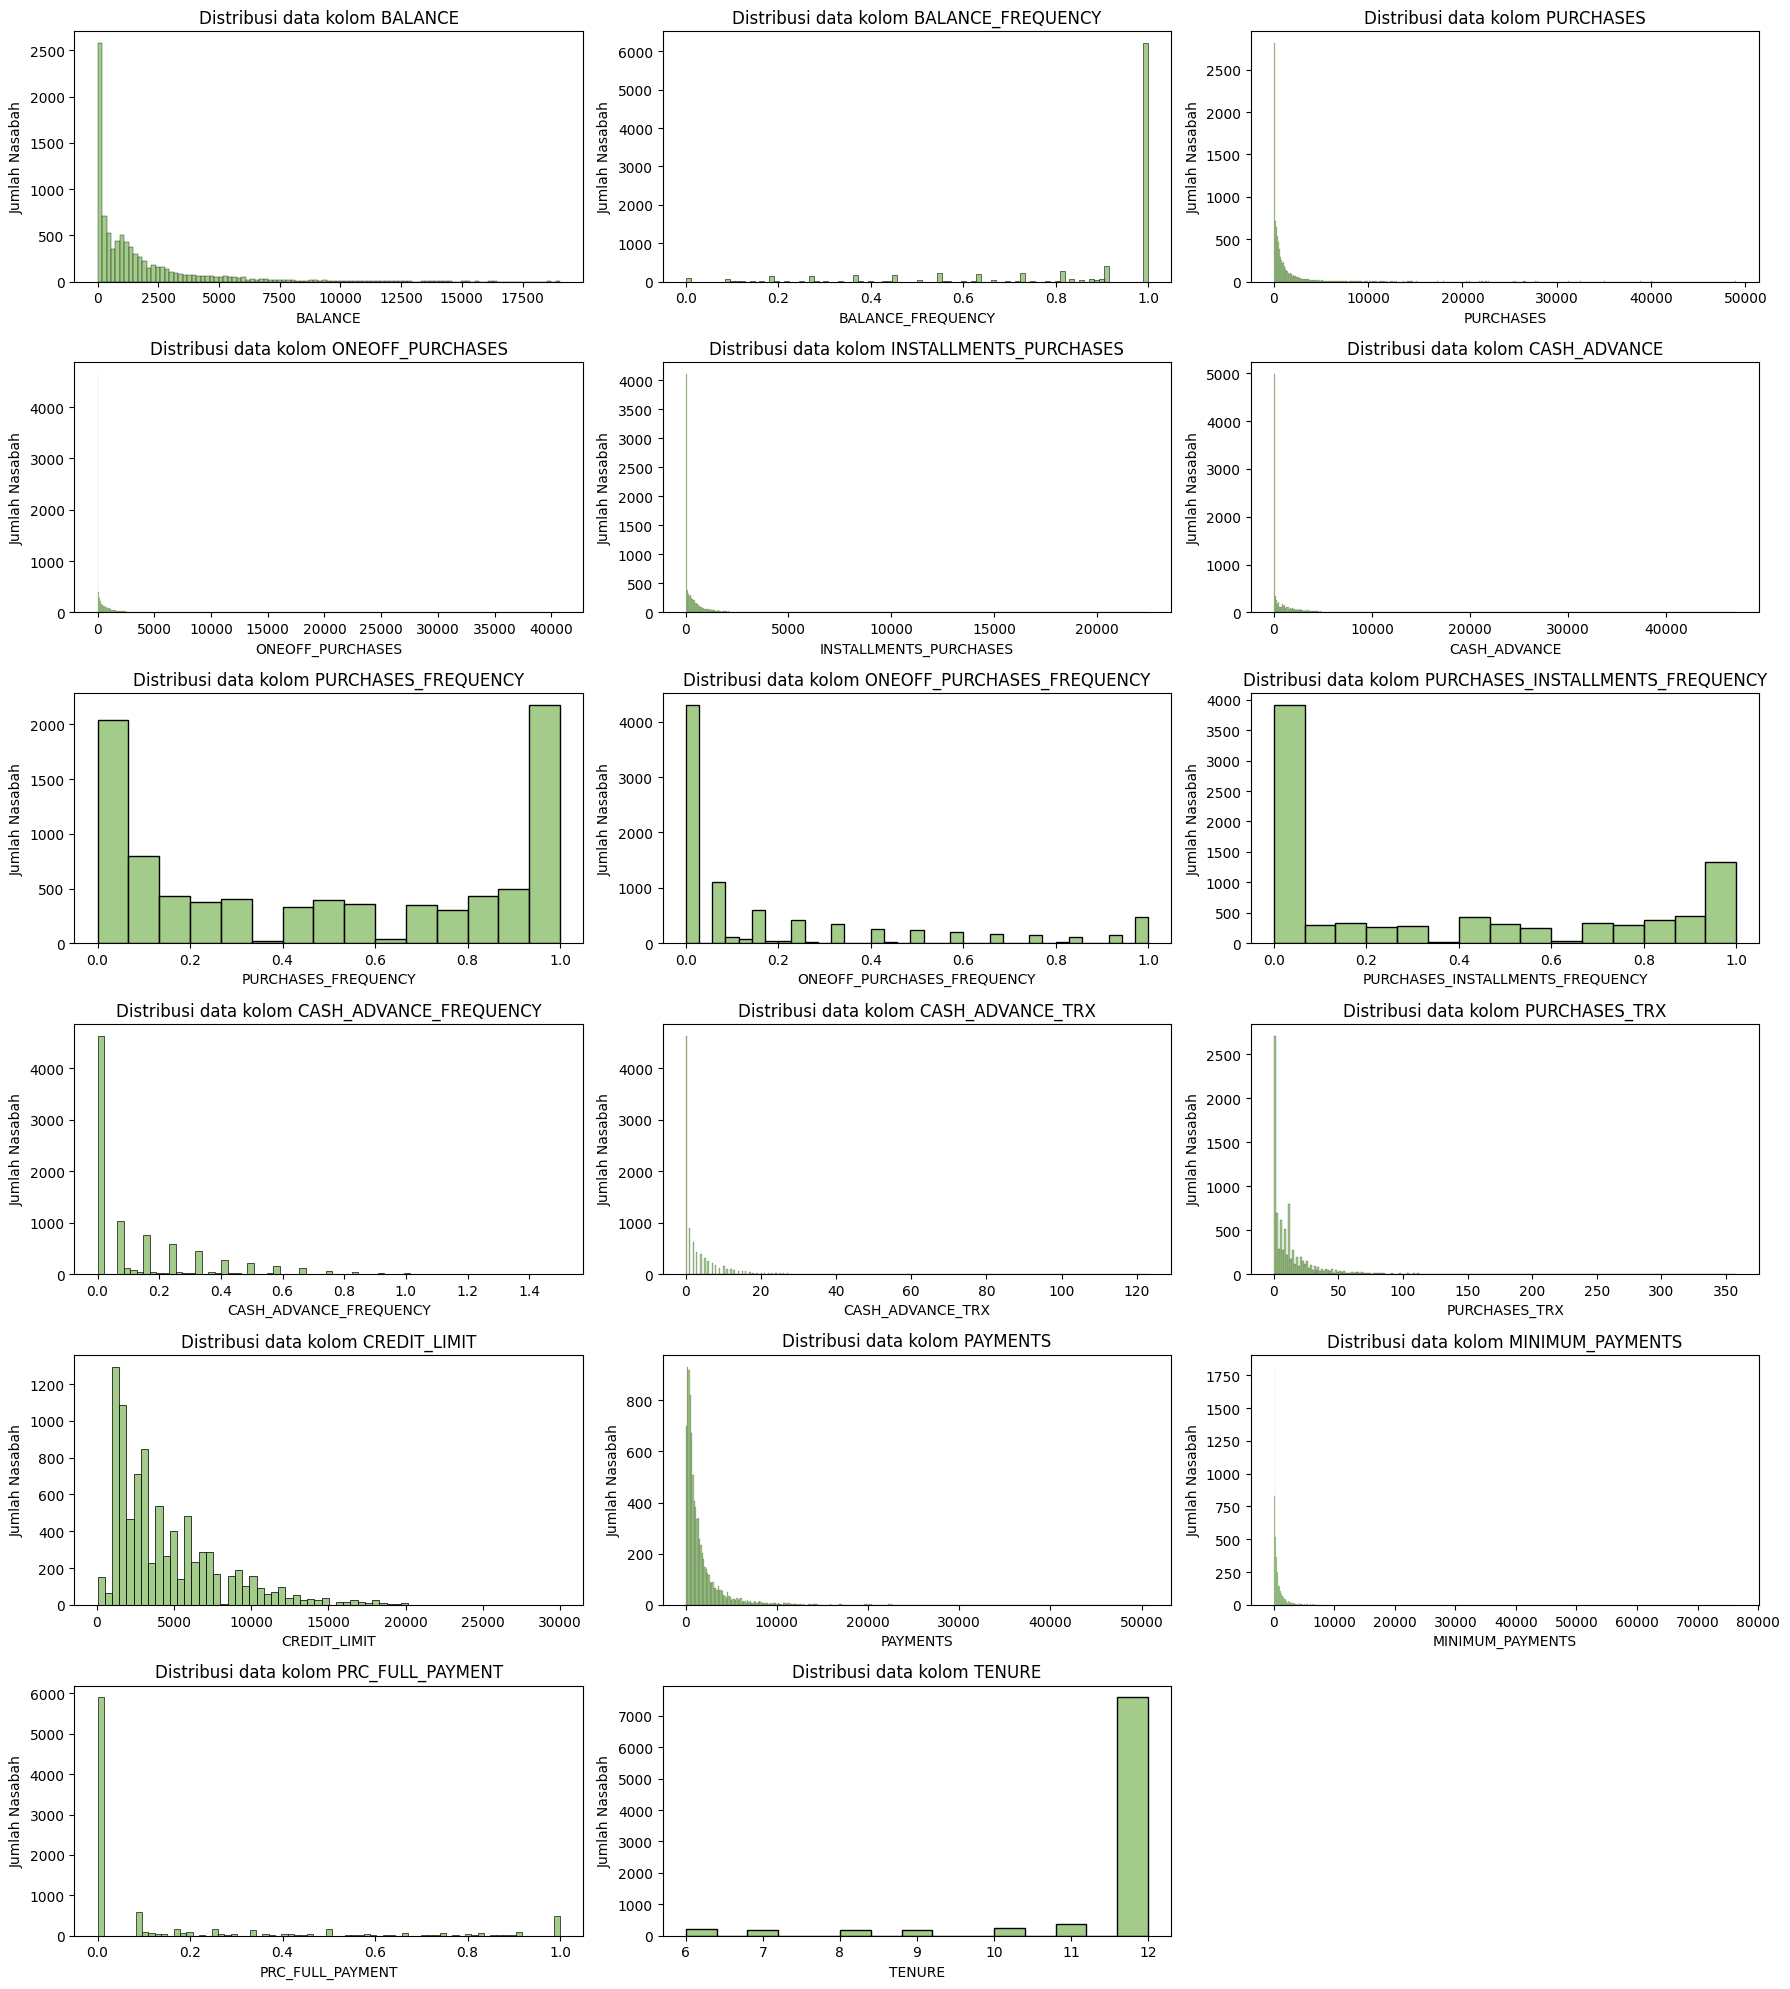

In [17]:
# plot distributi data dari semua kolom menggunakan histogram plot
count = 0
fig = plt.figure(figsize=(18, 20))
for feature in data.drop(columns='CUST_ID').columns:
    count +=1
    ax = plt.subplot(6,3,count)
    sns.histplot(data=data.drop(columns='CUST_ID'), x=feature, color=COLOR)
    plt.title(f"Distribusi data kolom {feature}")
    plt.ylabel("Jumlah Nasabah")
    fig.tight_layout()
plt.show()

**_Insight_**:
- Untuk kolom numerik yang bersifat continue, berdasarkan visualiasi di atas, terlihat jelas bahwa semua data tersebut bersifat **distribusinya tidak normal** dan memiliki sifat _right-skewed_. 
- Untuk kolom numerik yang bersifat ordinal, mayoritas nilainya adalah nol, kecuali pada kolom BALANCE_FREQUENCY, PURCHASES_FREQUENCY, dan TENURE. Pada kolom BALANCE_FREQUENCY mayoritas nilainya adalah satu, hal ini dapat terjadi karena para nasabah tersebut sering melakukan PURCHASES dan/atau PAYMENTS, sehingga BALANCE (available credit) juga akan sering ter-update. Pada kolom PURCHASES_FREQUENCY ada beberapa nasabah yang sama sekali tidak menggunakan kartu kredit (frekuensinya adalah 0), tetapi ada juga nasabah yang sering menggunakan kartu kredit (frekuensinya adalah 1). Mayoritas nasabah memilih TENURE yang 12 bulan. 
- .......

Referensi: 
- [Take Control of Credit Card Debt: Current Balance vs. Available Credit](https://upgradedpoints.com/credit-cards/current-balance-vs-available-credit/)
- [Available Credit: Meaning and Examples in Credit Cards](https://www.investopedia.com/terms/a/available-credit.asp#:~:text=Available%20credit%20refers%20to%20how,payments%20increase%20your%20available%20credit.)

In [11]:
# Cek menggunakan metode statistik shapiro test sebagai validasi apakah memang betul distribusinya tidak normal untuk data numerik yang bersifat continue

# kolom numerik yang bersifat continue
num_continue = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

# melakukan shapiro test
result_shapiro = []
for cols in num_continue:
    # pvalue selain kolom MINIMUM_PAYMENTS
    if cols not in ['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']:
        stats, pvalue = shapiro(data[cols])
        # check nilai p-value
        if pvalue > 0.05:
            result_shapiro.append({'kolom':cols, 'pvalue':pvalue, 'jenis_distribusi':'distribusi data normal'})
        else:
            result_shapiro.append({'kolom':cols, 'pvalue':pvalue, 'jenis_distribusi':'distribusi data tidak normal'})
    
    # pvalau kolom MINIMUM_PAYMENTS (terdapat nilai NaN, nilai p-value akan bias jika NaN values tidak dihapus)
    else:
        stats, pvalue = shapiro(data[cols].dropna())
        # check nilai p-value
        if pvalue > 0.05:
            result_shapiro.append({'kolom':cols, 'pvalue':pvalue, 'jenis_distribusi':'distribusi data normal'})
        else:
            result_shapiro.append({'kolom':cols, 'pvalue':pvalue, 'jenis_distribusi':'distribusi data tidak normal'})
    

# display hasil uji statistik
shapiro_df = pd.DataFrame(result_shapiro)
shapiro_df

,kolom,pvalue,jenis_distribusi
0,BALANCE,0.0,distribusi data tidak normal
1,PURCHASES,0.0,distribusi data tidak normal
2,ONEOFF_PURCHASES,0.0,distribusi data tidak normal
3,INSTALLMENTS_PURCHASES,0.0,distribusi data tidak normal
4,CASH_ADVANCE,0.0,distribusi data tidak normal
5,CREDIT_LIMIT,0.0,distribusi data tidak normal
6,PAYMENTS,0.0,distribusi data tidak normal
7,MINIMUM_PAYMENTS,0.0,distribusi data tidak normal


**_Insight_**:
- Setelah melakukan **uji normalitas dengan metode shapiro**, terbukti bahwa semua kolom numerik yang bersifat continue distribusi datanya tidak normal karena memiliki nilai p-value kurang dari 0.05
- Cek korelasi antar kolom akan dilakukan dengan metode Spearman (non-parametric method)

### 2. Hubungan Antar Kolom

1. Plot persebaran data antara kolom satu dengan kolom lainnya menggunakan metode scatter plot
2. Melakukan cek korelasi data antar kolom menggunakan metode Spearman
3. Melihat bagaimana hubungan antar kolom dengan melakukan visualisasi data

#### 2.1. Persebaran Data Menggunakan Scatter Plot

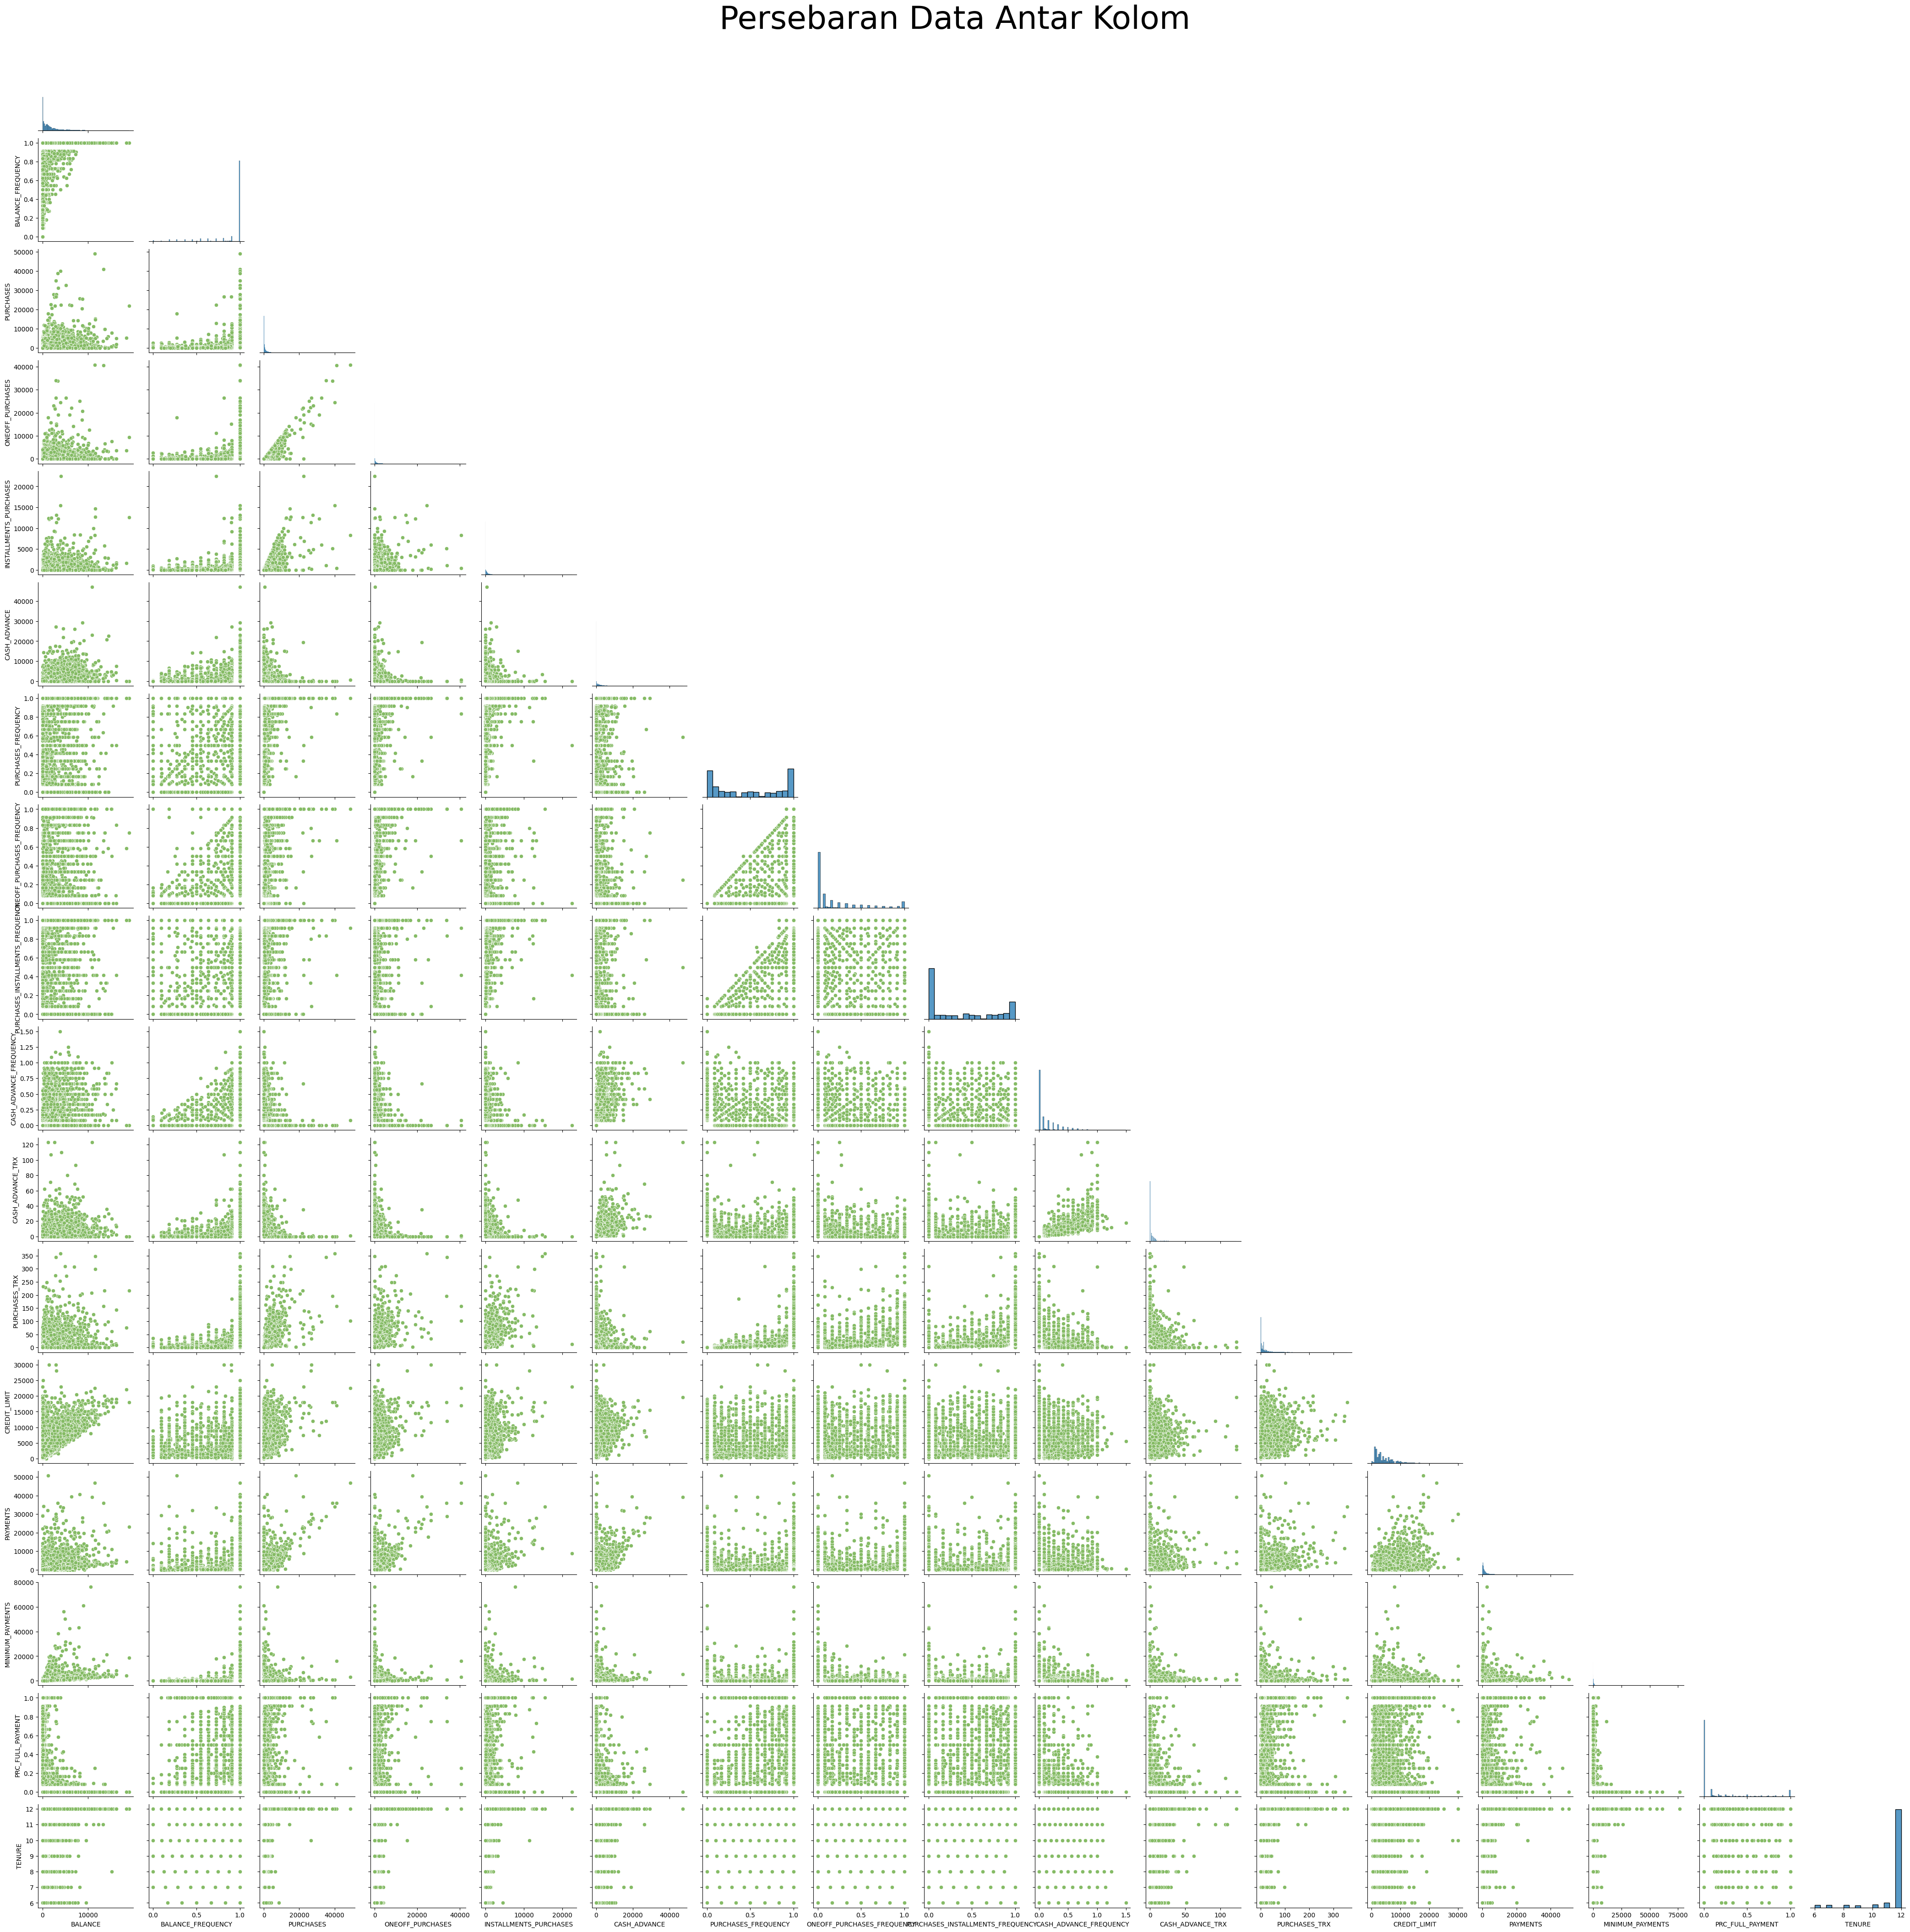

In [18]:
# plot persebaran data menggunakan scatter plot
grph = sns.pairplot(data.drop(columns='CUST_ID'), corner=True, diag_kind='hist', plot_kws=dict(color=COLOR))
grph.fig.suptitle("Persebaran Data Antar Kolom", y=1, fontsize=50)
plt.show()

**_Insight_**:
- Terdapat beberapa kolom yang persebaran datanya memiliki sifat cenderung **linear**, misalnya antara kolom ONEOFF_PURCHASES dengan kolom PURCHASES, kolom INSTALLMENT_PURCHASES dengan kolom PURCHASES. dsb. Namun banyak juga kolom yang persebaran datanya memiliki sifat **non-linear**, misalnya antara kolom CREDIT_LIMIT dengan kolom-kolom yang merupakan frekuensi (PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, dsb)
- Terdapat beberapa data yang sifatnya _bivariate outlier_. Misalnya, antara kolom PURCHASES dengan kolom BALANCE, ada nasabah yang total pembeliannya besar, tapi sisa saldo kartu kredit yang masih bisa digunakan juga besar. Hal ini dapat terjadi karena PURCHASES dilakukan secara ONEOFF_PURCHASES (tagihannya langsung dibayarkan (lunas))
- .......
- .......

#### 2.2. Cek Korelasi Data Antar Kolom Menggunakan Metode Spearman

Output nilai yang dihasilkan adalah nilai antara -1 sampai 1. Jika nilai data pada variabel/kolom "A" **bertambah**, begitu pula pada variabel/kolom "B", maka nilai output yang dihasilkan akan semakin **mendekati 1 (positif) atau berkorelasi tinggi**, sedangkan jika yang terjadi adalah **sebaliknya (berkurang)**, maka nilai output yang dihasilkan akan semakin **mendekati -1 (negatif) atau berkorelasi tinggi, namun arahnya negatif**. Kemudian, jika nilai output yang dihasilkan **mendekati 0**, hal ini berarti data pada variabel/kolom "A" **tidak memiliki korelasi** dengan data pada variabel/kolom "B". ([referensi_1](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient#:~:text=The%20sign%20of,coefficient%20becomes%201.), [referensi_2](https://en.wikipedia.org/wiki/Monotonic_function))

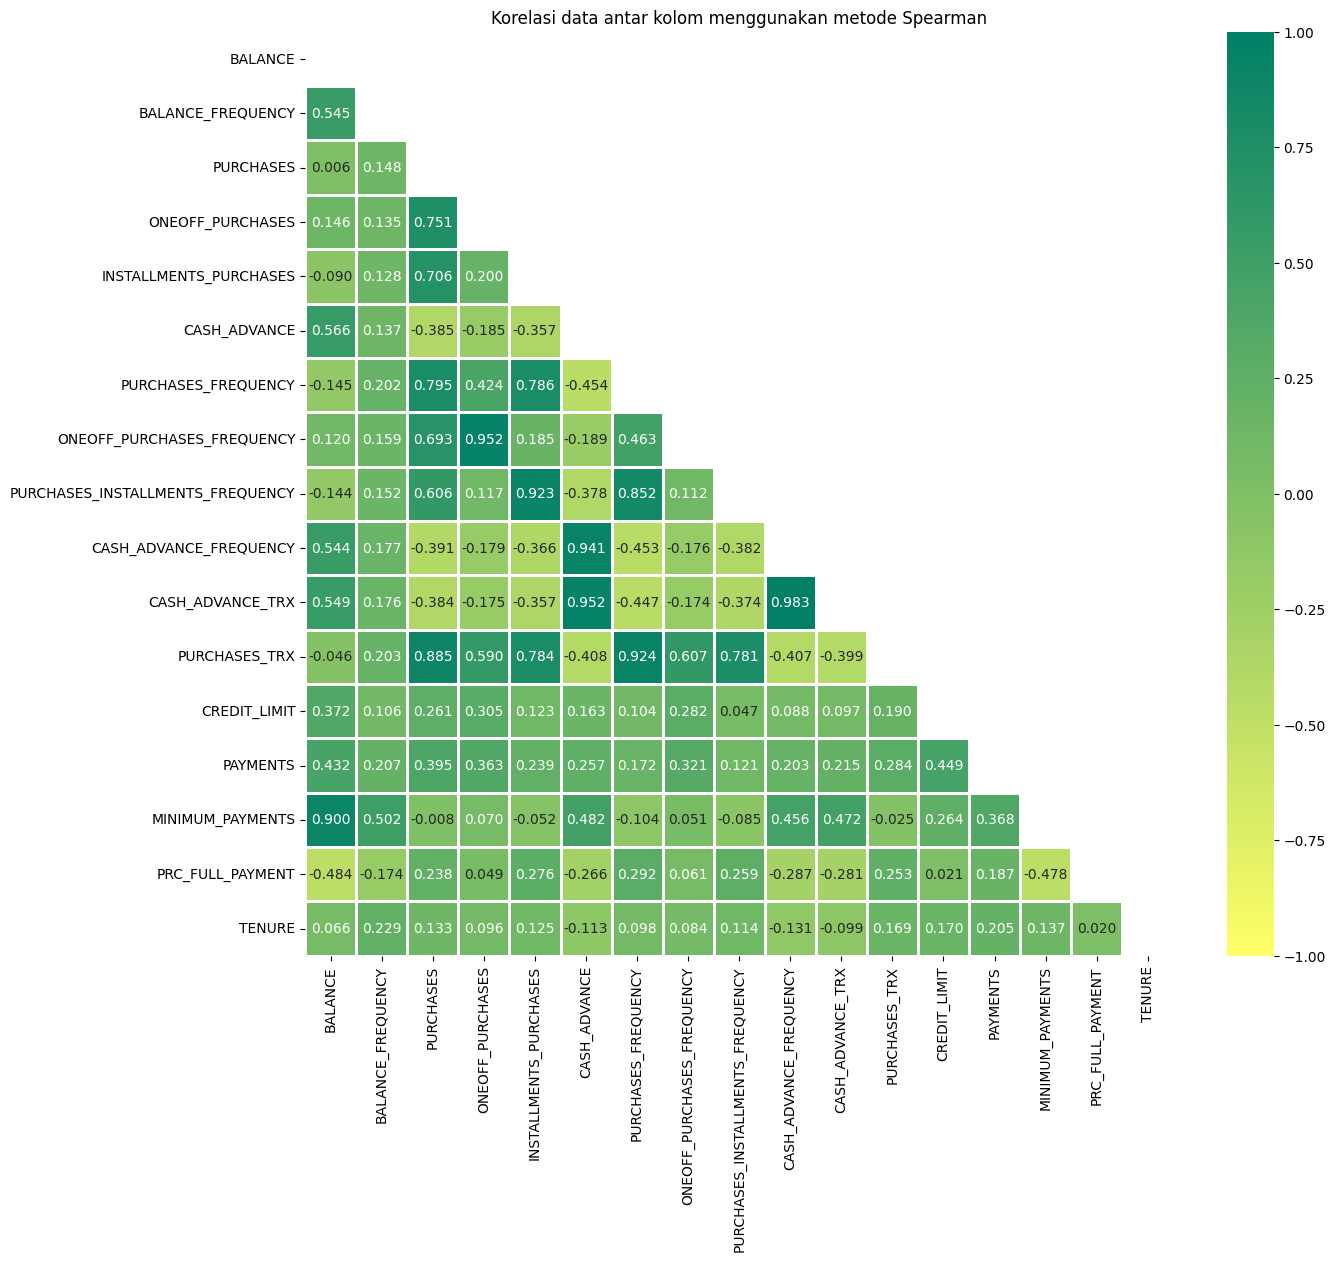

In [60]:
# cek korelasi data antar kolom menggunakan metode Spearman

# data nilai korelasi
matrix = np.triu(data.drop(columns='CUST_ID').corr(method='spearman'))
# color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# plot data nilai korelasi menggunakan grafik heatmap
plt.figure(figsize=(14,12))
plt.title("Korelasi data antar kolom menggunakan metode Spearman")
sns.heatmap(data=data.corr(method='spearman'), annot=True, fmt=".3f", cmap=CUSTOM_SUMMER, vmin=-1, vmax=1, mask=matrix, linewidths=2);

**_Insight_**:
- Terdapat beberapa pola yang memiliki kecenderungan yang sama, yaitu data yang berupa frekuensi atau jumlah transaksi memiliki nilai korelasi positif yang tinggi dengan data yang berkaitan dengan data itu sendiri. Contohnya dapat dilihat pada kolom CASH_ADVANCE_FREQUENCY berkorelasi tinggi (0.941) dengan kolom CASH_ADVANCE dan juga dengan kolom CASH_ADVANCE_TRX (0.983), kolom PURCHASES_FREQUENCY berkorelasi tinggi (0.795) dengan kolom PURCHASES dan juga dengan kolom PURCHASES_TRX (0.924), dsb.
- Terdapat juga nilai korelasi negatif yang sedikit cenderung linear, misalnya antara kolom PRC_FULL_PAYMENT dengan kolom MINIMUM_PAYMENTS (-0.478). Hal menunjukkan pola ada beberapa customer yang melakukan pembayaran (payment) yang nilainya semakin besar, tapi total presentase yang disudah dibayarkan semakin kecil.
- .......
- .......

#### 2.3. Melihat hubungan antar kolom dengan melakukan visualisasi data

>2.3.1. CREDIT_LIMIT vs PURCHASES, PAYMENTS, dan BALANCE

Melihat bagaimana pengaruh PURCHASES, PAYMENTS, dan BALANCE terhadap CREDIT_LIMIT nasabah

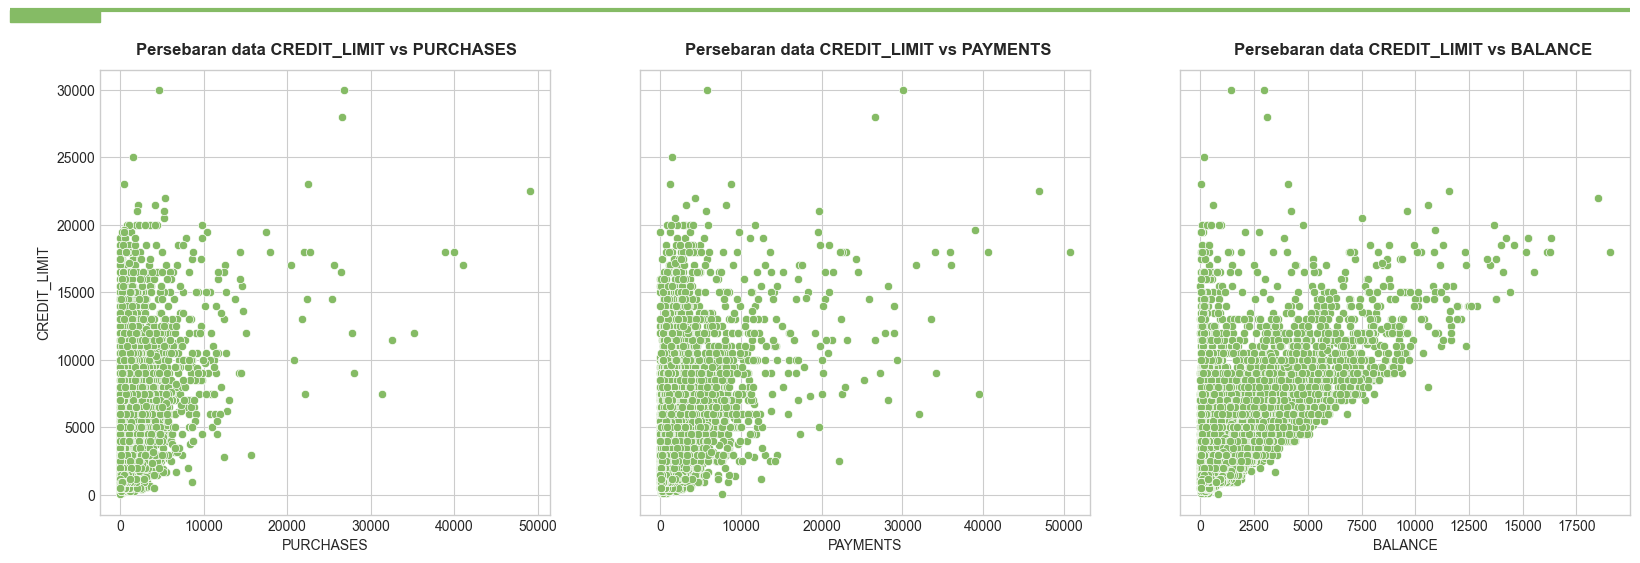

In [59]:
# melihat hubungan bagaimana CREDIT_LIMIT vs BALANCE dan CREDIT_LIMIT vs PAYMENTS dengan visualisasi grafik

# grafik style
plt.style.use('seaborn-v0_8-whitegrid')

# inisialisasi plot
fig, (ax1,ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,5), sharey=True)

# adjust subplot
plt.subplots_adjust(left=0.05, top=1)

# garis lurus dan bentuk persegi panjang di atas
fig.add_artist(lines.Line2D([0, 0.9], [1.12, 1.12], lw=3, color=COLOR, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 1.095), 0.05, 0.025, color=COLOR))

# judul grafik
fig.text(0.07, 1.03, "Persebaran data CREDIT_LIMIT vs PURCHASES", fontsize=12, fontweight="bold")
fig.text(0.375, 1.03, "Persebaran data CREDIT_LIMIT vs PAYMENTS", fontsize=12, fontweight="bold")
fig.text(0.68, 1.03, "Persebaran data CREDIT_LIMIT vs BALANCE", fontsize=12, fontweight="bold")

# display grafik
sns.scatterplot(data=data, x='PURCHASES', y='CREDIT_LIMIT', color=COLOR, ax=ax1)
sns.scatterplot(data=data, x='PAYMENTS', y='CREDIT_LIMIT', color=COLOR, ax=ax2)
sns.scatterplot(data=data, x='BALANCE', y='CREDIT_LIMIT', color=COLOR, ax=ax3)

plt.show();

**_Insight_**:
- Ada beberapa pola yang terbentuk, antara lain:
    - Pola semakin besar CREDIT_LIMIT, semakin besar pula BALANCE. Hal ini menunjukkan bahwa terdapat nasabah yang memiliki CREDIT_LIMIT besar, sisa saldo yang masih dapat digunakan juga besar (kedua variabel cenderung semakin besar). Atau dengan kata lain, nasabah tersebut **jarang menggunakan kartu kreditnya** atau nasabah tersebut **sering melakukan pembelian (PURCHASES) dan membayar sesuai tagihannya (PAYMENTS)**
    - Namun, ada juga nasabah yang memiliki CREDIT_LIMIT besar, tapi **tidak ada** sisa saldo yang masih dapat digunakan. Atau dengan kata lain, nasabah tersebut nasabah yang memiliki CREDIT_LIMIT besar, nasabah tersebut cenderung **sering menggunakan kartu kredit**, bahkan sampai tidak ada saldo yang tersisa, tapi **tidak membayar tagihannya (PAYMENTS = 0)**

Referensi:
- [How Credit Card Companies Determine Credit Limit](https://www.investopedia.com/articles/credit-loans-mortgages/081516/how-credit-card-companies-determine-credit-limit-expn.asp#:~:text=What%20Affects%20Your,on%20your%20report.)
- [What Is a Credit Limit? How It's Determined and How to Increase It](https://www.investopedia.com/terms/c/credit_limit.asp#citation-3:~:text=3-,Can%20Lenders%20Change%20Your%20Credit%20Limit%3F,-In%20most%20cases)

>2.3.2. Bagaimana jenis-jenis nasabah jika dilihat dari metode/cara mereka melakukan pembelian ? Apakah secara langsung lunas (ONEOFF) dan/atau secara angsuran (INSTALLMENTS) ?

In [5]:
# membuat fungsi untuk kondisi pada kolom baru PURCHASES_TYPE
def purchases_type(df: pd.DataFrame):
    if df['ONEOFF_PURCHASES'] == 0 and df['INSTALLMENTS_PURCHASES'] == 0: return 'NO PURCHASES'
    elif df['ONEOFF_PURCHASES'] > 0 and df['INSTALLMENTS_PURCHASES'] > 0: return 'BOTH'
    elif df['ONEOFF_PURCHASES'] > 0 and df['INSTALLMENTS_PURCHASES'] == 0: return 'ONEOFF'
    elif df['ONEOFF_PURCHASES'] == 0 and df['INSTALLMENTS_PURCHASES'] > 0: return 'INSTALLMENTS'

# membuat kolom PURCHASES_TYPE
data['PURCHASES_TYPE'] = data.apply(purchases_type, axis=1)
data.sample(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASES_TYPE
3178,C13269,4504.793340,1.000000,0.00,0.00,0.00,4707.988554,0.000000,0.000000,0.000000,1.000000,34,0,7500.0,1786.385347,1086.360075,0.000000,12,NO PURCHASES
4822,C14956,2772.790822,1.000000,337.98,0.00,337.98,198.185224,1.000000,0.000000,1.000000,0.416667,7,45,3000.0,1043.396353,1046.955311,0.000000,12,INSTALLMENTS
5348,C15500,2409.236843,1.000000,990.15,772.60,217.55,0.000000,0.750000,0.416667,0.416667,0.000000,0,26,8000.0,707.712681,606.899998,0.000000,12,BOTH
4734,C14863,1132.796058,1.000000,519.79,519.79,0.00,0.000000,0.583333,0.583333,0.000000,0.000000,0,8,1200.0,642.723631,436.088187,0.000000,12,ONEOFF
4064,C14180,1325.445684,0.818182,0.00,0.00,0.00,1895.470431,0.000000,0.000000,0.000000,0.083333,1,0,4500.0,187.108587,566.078539,0.000000,12,NO PURCHASES
8171,C18391,2006.452959,1.000000,219.97,0.00,219.97,308.933151,0.750000,0.000000,0.750000,0.166667,2,9,2000.0,529.967984,823.904160,0.000000,12,INSTALLMENTS
2799,C12880,115.376754,1.000000,448.15,448.15,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,13,9000.0,423.564594,174.871144,0.000000,12,ONEOFF
3651,C13754,1138.314061,1.000000,470.17,470.17,0.00,553.632474,0.250000,0.250000,0.000000,0.083333,1,3,2100.0,0.000000,NaN,0.000000,12,ONEOFF
871,C10902,2767.545277,1.000000,3480.24,2767.28,712.96,0.000000,1.000000,1.000000,0.666667,0.000000,0,60,12500.0,4062.447703,1082.201074,0.000000,12,BOTH
2420,C12493,1264.152747,1.000000,2358.28,2171.80,186.48,144.017573,1.000000,0.500000,0.833333,0.166667,2,28,2500.0,1175.753031,330.579046,0.166667,12,BOTH


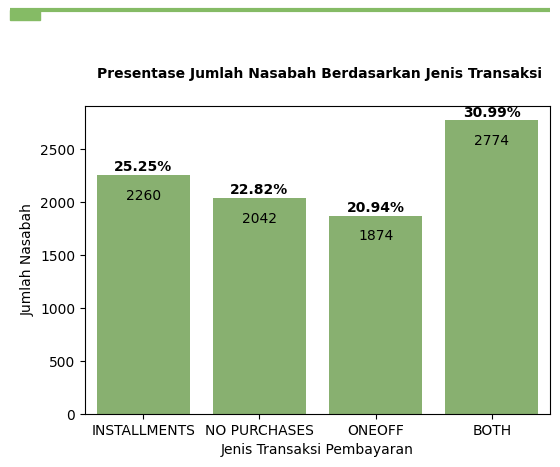

In [56]:
fig, ax = plt.subplots(figsize=(6,4))

# garis lurus dan bentuk persegi panjang di atas
fig.add_artist(lines.Line2D([0, 0.9], [1.12, 1.12], lw=3, color=COLOR, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 1.095), 0.05, 0.025, color=COLOR))

# judul grafik
fig.text(0.145, 0.95, "Presentase Jumlah Nasabah Berdasarkan Jenis Transaksi", fontsize=10, fontweight="bold")

# plot grafik jenis transaksi pembayaran
purchase_type_plot = sns.countplot(
    data=data, 
    x="PURCHASES_TYPE",
    color=COLOR
)

# anotasi jumlah nasabah
for bar in purchase_type_plot.patches:
    purchase_type_plot.annotate(
        format(bar.get_height(), '.0f'), (bar.get_x() + bar.get_width() / 2, bar.get_height() + 2), 
        ha='center', 
        va='center',
        size=10, 
        xytext=(0, -15),
        textcoords='offset points')
    
# anotasi persentase jumlah nasabah
for p in purchase_type_plot.patches:
    percentage = f'{100 * p.get_height() / len(data):.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    purchase_type_plot.annotate(percentage, (x, y), ha='center', va='center', size=10, fontweight='bold')

plt.xlabel("Jenis Transaksi Pembayaran")
plt.ylabel("Jumlah Nasabah")
plt.show()

**_Insight_**:
- ......
- ......

>2.3.3. MINIMUM_PAYMENTS vs ......

Seperti yang telah diketahui di atas, kolom MINIMUM_PAYMENTS berkorelasi positif tinggi dengan kolom BALANCE. Pada kolom MINIMUM_PAYMENTS juga terdapat _missing values_ sebesar 3.497%. Selanjutnya, tim Data Scienstist melakukan analisa visualiasi terhadap kedua kolom tersebut ???????

<Axes: xlabel='BALANCE', ylabel='MINIMUM_PAYMENTS'>

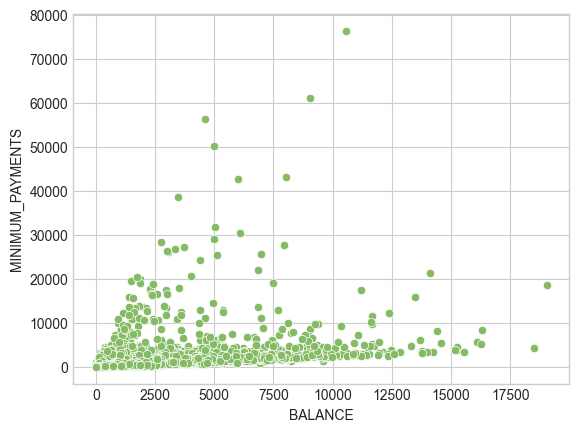

In [30]:
# melihat hubungan bagaimana MINIMUM_PAYMENTS vs BALANCE dengan visualisasi grafik
sns.scatterplot(data=data, x='BALANCE', y='MINIMUM_PAYMENTS', color=COLOR);

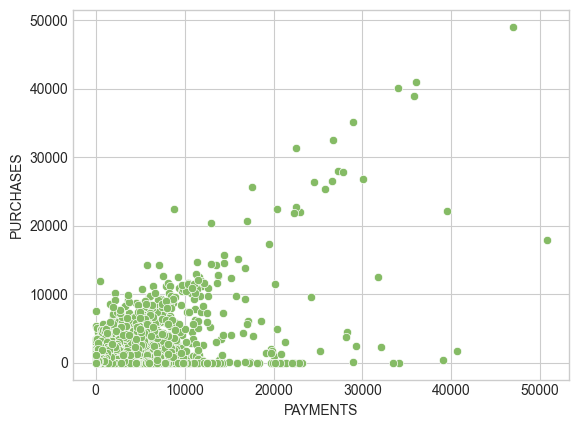

In [34]:
sns.scatterplot(data=data, x='PAYMENTS', y='PURCHASES', color=COLOR);



2.3.3. .......

.....

.....

dst

### 3. Identifikasi missing values, data outlier, dan data duplikat 

#### 3.1. Identifikasi _Missing Values_

- 0.01% _missing values_ pada kolom CREDIT_LIMIT
- 3.497% _missing values_ pada kolom MINIMUM_PAYMENTS

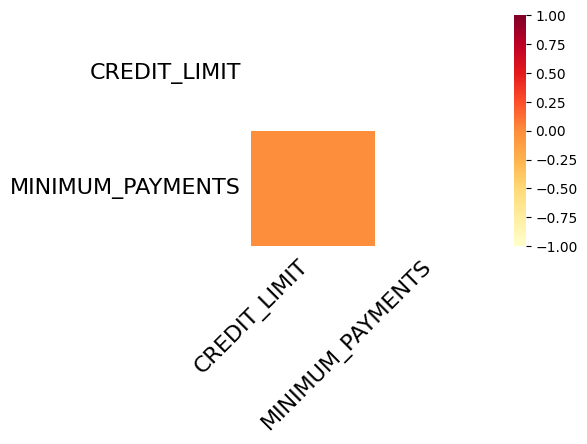

In [45]:
# cek bagaimana korelasi missing values antar kolom
msno.heatmap(data, cmap='YlOrRd' ,figsize=(4,3));

**_Insight_**:
- **Tidak ada korelasi** missing values antara kolom CREDIT_LIMIT dan MINIMUM_PAYMENTS

#### 3.2. Identifikasi Data Outlier secara _Univariate Analysis_

#### 3.3. Identifikasi Data Duplikat

Karena nantinya kolom CUST_ID tidak digunakan untuk analisa selanjutnya, maka pengecekan duplikat data juga tanpa kolom CUST_ID. Hal ini juga berguna untuk memastikan apakah terdapat data nasabah yang tercatat lebih dari 1 kali, walaupun CUST_ID-nya berbeda, jika ada, kemungkinan telah terjadi _human error_ atau _bug_ ketika proses memasukan data nasabah tersebut.

In [5]:
# cek duplikat data tanpa kolom CUST_ID
if data.drop(columns='CUST_ID').loc[data.duplicated()].shape[0] != 0:
    # menampilkan DataFrame
    display(data.drop(columns='CUST_ID').loc[data.duplicated()])
    print(f"Terdapat data duplikat sebanyak: \x1b[31m{data.drop(columns='CUST_ID').loc[data.duplicated()].shape[0]} baris\x1b[0m")
else:
    # menampilkan DataFrame
    display(data.drop(columns='CUST_ID').loc[data.duplicated()])
    print("Tidak terdapat data duplikat")

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


Tidak terdapat data duplikat


## `Preprocessing`

In [ ]:
# copy dataset ke dalam variabel lain, agar tidak mengubah dataset aslinya. Hal ini bertujuan jika nantinya terdapat analisa yang mengharuskan membandingkan dengan dataset aslinya
data_beta = data.copy()

### Handling Missing Values

#### 1. Kolom CREDIT_LIMIT

Terdapat 0.01% atau 1 nasabah yang tidak memiliki data CREDIT_LIMIT. Namun, karena tim Data Scientist tidak ingin kehilangan informasi, meskipun hanya 1 nasabah, oleh karena itu _missing value_ tersebut akan di-handling dengan cara .......

In [ ]:
# handling missing value pada kolom CREDIT_LIMIT dengan metode

#### 2. Kolom MINIMUM_PAYMENTS

### Handling Data Outlier

### Drop Kolom

#### 1. Kolom CUST_ID

Seperti yang telah disebutkan di atas, kolom CUST_ID merupakah kolom unique ID para nasabah yang diberikan oleh pihak Bank, agar dapat dibedakan antar satu nasabah dengan nasabah yang lain. Unique ID pada dataset ini tidak ada yang duplikat atau dengan kata lain tidak ada data nasabah yang tercatat lebih dari 1 kali. **Kolom CUST_ID tidak memberikan informasi yang berkaitan dengan perilaku bagaimana nasabah menggunakan kartu kreditnya**. Kemudian, untuk analisa selanjutnya juga tidak diperlukan kolom CUST_ID, sehingga tim Data Scientist tidak menggunakan kolom tersebut untuk proses analisa selanjutnya.

In [6]:
# menghapus kolom CUST_ID
data_beta = data_beta.drop(columns='CUST_ID')

# cek apakah masih terdapat kolom CUST_ID atau tidak
if 'CUST_ID' in list(data_beta.columns):
    print("Kolom CUST_ID \x1b[31mmasih\x1b[0m terdapat pada dataset")
else:
    print("Kolom CUST_ID berhasil dihapus dari dataset")


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2844,1647.990537,1.000000,127.46,127.46,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,2,3500.0,414.257207,486.378735,0.000000,12
5055,14.570032,1.000000,89.58,0.00,89.58,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,71.641741,83.215986,1.000000,6
2353,753.703481,1.000000,0.00,0.00,0.00,899.346012,0.000000,0.000000,0.000000,0.083333,2,0,1200.0,1065.666403,160.863666,0.083333,12
1232,1564.180333,1.000000,942.22,773.60,168.62,397.711480,1.000000,0.500000,1.000000,0.250000,3,36,2200.0,2852.584209,759.107707,0.000000,12
5506,714.813335,1.000000,1110.42,0.00,1110.42,0.000000,0.500000,0.000000,0.500000,0.000000,0,6,2200.0,4296.908322,4130.592522,0.083333,12
6731,92.261256,0.272727,666.68,0.00,666.68,0.000000,0.333333,0.000000,0.333333,0.000000,0,4,900.0,2510.558599,259.141203,0.000000,12
2180,2005.414367,1.000000,0.00,0.00,0.00,510.618121,0.000000,0.000000,0.000000,0.250000,3,0,2100.0,746.145517,477.944936,0.000000,12
208,6467.885013,1.000000,1464.14,978.71,485.43,3947.867840,0.833333,0.583333,0.666667,0.416667,10,23,11500.0,1658.563509,1887.413517,0.000000,12
6598,5091.643375,1.000000,0.00,0.00,0.00,2302.860148,0.000000,0.000000,0.000000,0.500000,10,0,6000.0,1315.487080,1815.957627,0.000000,12
1159,230.823876,1.000000,1842.33,0.00,1842.33,0.000000,0.916667,0.000000,0.833333,0.000000,0,12,3000.0,1651.128297,174.020429,0.333333,12


---------
---------
---------

In [5]:
data.query("CASH_ADVANCE_FREQUENCY > 1.0")

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
681,C10708,5656.069801,1.000000,362.36,362.36,0.0,7240.433194,0.250000,0.250000,0.0,1.250000,12,2,8000.0,683.421497,2036.877611,0.0,8
1626,C11680,2876.009336,1.000000,152.61,152.61,0.0,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0,248.342971,584.926336,0.0,6
2555,C12629,5906.184924,1.000000,141.80,141.80,0.0,1651.286918,0.125000,0.125000,0.0,1.125000,12,2,10000.0,933.969974,919.289675,0.0,8
2608,C12684,7801.511533,1.000000,231.40,231.40,0.0,4109.465221,0.100000,0.100000,0.0,1.100000,20,3,13500.0,1593.617739,1522.496755,0.0,10
3038,C13127,3846.742530,1.000000,0.00,0.00,0.0,1932.460679,0.000000,0.000000,0.0,1.500000,18,0,5600.0,496.245836,538.346874,0.0,6
3253,C13347,5709.486507,0.833333,0.00,0.00,0.0,2794.326341,0.000000,0.000000,0.0,1.166667,10,0,6000.0,550.513331,1299.463370,0.0,6
8055,C18273,1917.895730,1.000000,285.07,285.07,0.0,6084.858872,0.363636,0.363636,0.0,1.090909,28,6,3000.0,5692.682993,556.449635,0.0,11
8365,C18588,3857.562230,1.000000,0.00,0.00,0.0,2127.213754,0.000000,0.000000,0.0,1.142857,26,0,5000.0,617.508991,538.396872,0.0,7
